In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
data = data_train.append(data_test, sort=False)

In [3]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [4]:
data_test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [5]:
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
data["month"] = data.date.apply(lambda x : x.split('-')[1])
data["day"] = data.date.apply(lambda x : x.split('-')[2])

In [8]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
date           object
hour           object
month          object
day            object
dtype: object

In [9]:
categoryVariableList = ["hour","season","weather","holiday","workingday", "month", "day"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [10]:
data.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual         float64
registered     float64
count          float64
date            object
hour          category
month         category
day           category
dtype: object

In [11]:
#data  = data.drop(["datetime", "date"],axis=1)

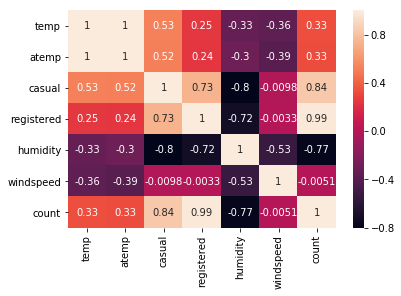

In [12]:
import seaborn as sns
corr = data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr().corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

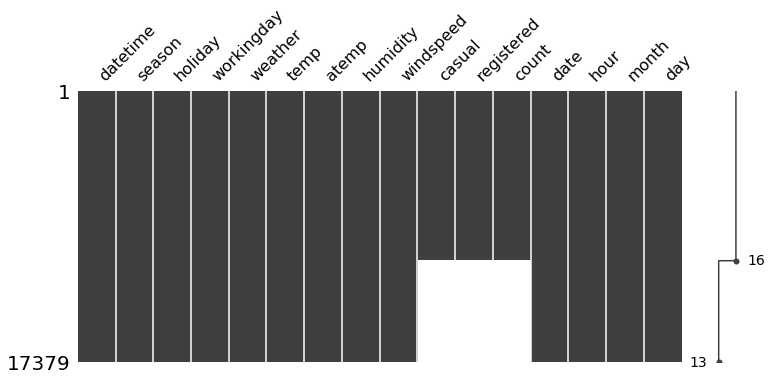

In [13]:
import missingno as msno
msno.matrix(data,figsize=(12,5))

In [14]:
data_train = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
data_test = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = data_test["datetime"]
data_train = data_train.drop(["datetime", "date", "temp", "registered", "casual", "windspeed"], axis=1)
data_test = data_test.drop(["datetime", "date", "temp", "registered", "casual", "count", "windspeed"], axis=1)
data_train.head()

,season,holiday,workingday,weather,atemp,humidity,count,hour,month,day
0,1,0,0,1,14.395,81,16.0,00,01,01
1,1,0,0,1,13.635,80,40.0,01,01,01
2,1,0,0,1,13.635,80,32.0,02,01,01
3,1,0,0,1,14.395,75,13.0,03,01,01
4,1,0,0,1,14.395,75,1.0,04,01,01


In [15]:
datavtr = data_train.values
datavte = data_test.values
print (datavte.shape)

(6493, 9)


In [16]:
X_train = datavtr[:, :-1]
y_train = datavtr[:, -1]
X_test = datavte[:, :]
print (X_train.shape)

(10886, 9)


In [17]:
X_train[:, 4].mean()

23.65508405291192

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:7] = sc.fit_transform(X_train[:, 4:7])
X_test[:, 4:7] = sc.transform(X_test[:, 4:7])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
X_train[:, 4].mean()

-3.9901533809153474e-15

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr = rfr.fit(X_train, y_train)
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}


In [23]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True 
[CV] n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True 
[CV] n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True 
[CV] n_estimators=200, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True, total=   5.2s
[CV]  n_estimators=200, max_features=log2, max_depth=100, bootstrap=True, total=   5.2s
[CV] n_estimators=200, max_features=log2, max_depth=100, bootstrap=True 
[CV] n_estimators=200, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True, total=   5.4s
[CV] n_estimators=1000, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, max_features=sqrt, max_depth=None, bootstrap=True, total=   5.7s
[CV] n_estimators=1000, max_features=log2, max_depth=20, bootstrap=Tru

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [24]:
from sklearn.metrics import mean_squared_log_error

def evaluate(model, test_features):
    predictions = model.predict(test_features)
    model_score = np.sqrt(mean_squared_log_error(y_train, predictions))
    
    return model_score

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_score = evaluate(base_model, X_train)
print ("Base Score : " + str(base_score))


best_random = rf_random.best_estimator_
random_score = evaluate(best_random, X_train)
print ("Random Score : " + str(random_score))

print('Improvement of {:0.2f}%.'.format( random_score - base_score))

Base Score : 0.273747997184
Random Score : 0.304999217662
Improvement of 0.03%.


In [25]:
predictions_test_random = best_random.predict(X_test)
predictions_test_base = base_model.predict(X_test)

In [26]:
predictions_train = rfr.predict(X_train)

In [27]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": predictions_test_random
    })
submission.to_csv('submit.csv', index=False)